# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd '/content/drive/My Drive/DSF HW2/'

/content/drive/My Drive/DSF HW2


In [0]:
df1 = pd.read_csv('train_transaction.csv')
df2 = pd.read_csv('train_identity.csv')

In [0]:
t1 = ['TransactionID','isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 
     'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2', 'dist1' , 'dist2']
t2 = ['TransactionID', 'DeviceType', 'DeviceInfo']
df1 = df1[t1]
df2 = df2[t2]

In [0]:
df_main = pd.merge(df2,df1, on = "TransactionID", how = "outer")
map1 = df_main['isFraud'] == 1
map2 = df_main['isFraud'] == 0
df_fraud = df_main[map1]
df_nfraud = df_main[map2]

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

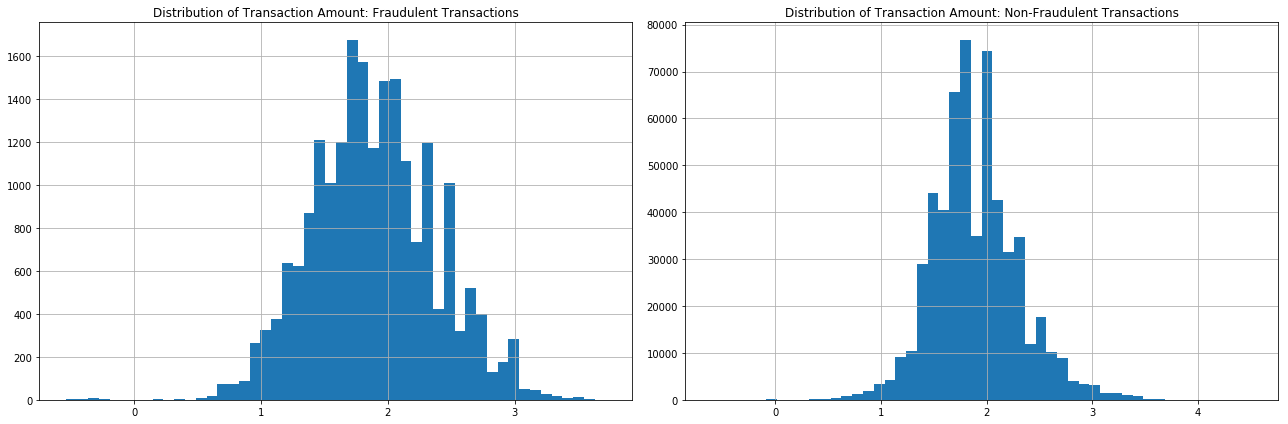

In [187]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
hists_fraud = np.log10(df_fraud['TransactionAmt']).hist(bins = 50)
plt.title('Distribution of Transaction Amount: Fraudulent Transactions')
plt.subplot(1,2,2)
hists_nfraud = np.log10(df_nfraud['TransactionAmt']).hist(bins = 50)
plt.title('Distribution of Transaction Amount: Non-Fraudulent Transactions')
plt.tight_layout()

The graph above shows the distribution of Transaction amounts for fraudulent vs non-fradulent transactions. These two distributions seem to be very similar in comparison. I think that this makes sense intuitively as a person committing a fraud would want to make the transaction amount closely resemble that of a normal transaction amount so as not to be flagged immediately on this basis.

In [188]:
#Distributoon of Device Types
fraud_device_types = df_fraud['DeviceType'].value_counts()
nfraud_device_types = df_nfraud['DeviceType'].value_counts()

print(fraud_device_types)
print(nfraud_device_types)

mobile     5657
desktop    5554
Name: DeviceType, dtype: int64
desktop    79611
mobile     49988
Name: DeviceType, dtype: int64


Above, we can see the distribution of values of the number of fraudlent transactions where the device type was a mobile/desktop and the same distribution for non-fraudulent transactions. Here, we can see that the number of frauduluent transactions was slightly higher where the device type was a mobile phone. However, the correlation does not seem to be too high between the device used and the probability of fraud, as the values seem to be too close to each other.

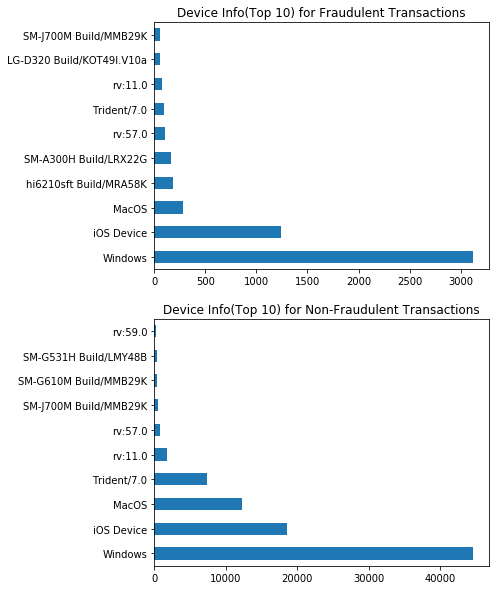

In [189]:
fraud_device_info = df_fraud['DeviceInfo'].value_counts()
nfraud_device_info = df_nfraud['DeviceInfo'].value_counts()
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
fraud_device_info.nlargest(10).plot(kind = 'barh', figsize = (6,10))
plt.title('Device Info(Top 10) for Fraudulent Transactions')
plt.subplot(2,1,2)
nfraud_device_info.nlargest(10).plot(kind = 'barh', figsize = (6,10))
plt.title('Device Info(Top 10) for Non-Fraudulent Transactions')
plt.show()

#Consider Taking Ratios of Fraud/Non-Fraud count by device info

Above, we can see the top 10 devices used in fraudulent/non-fraudulent transactions from the data. From these charts, it is particularly interesting to notice that a couple of devices, namely, "hi6210sft Build/MRA58K " and "SM-A300H Build/LRX22G" are in the top 10 for fraudulent transactions but are non-existent in the category of non-fraudulent transactions. Another thing i noticed was the absence of quite a few values for this column in many rows in the data.

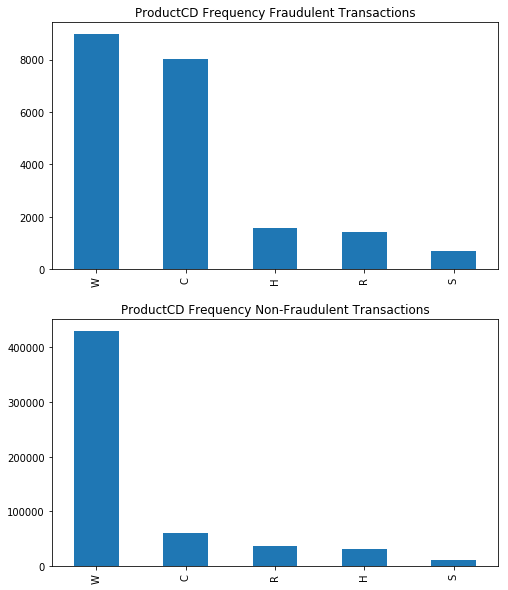

In [190]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
df_fraud['ProductCD'].value_counts().plot(kind = 'bar', figsize = (6,10))
plt.title('ProductCD Frequency Fraudulent Transactions')
plt.subplot(2,1,2)
df_nfraud['ProductCD'].value_counts().plot(kind = 'bar', figsize = (8,10))
plt.title('ProductCD Frequency Non-Fraudulent Transactions')
plt.show()

From the above bar chart of distribution of the transactions based on product codes, it is visible that the most popular product code is clearly 'W'. Also, we can see that the ratio of fraudulent transactions seems to be the most for the product codes 'C' and 'H' from the bar charts.

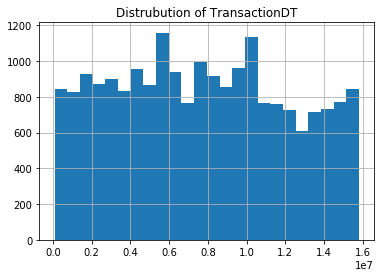

In [191]:
hist_dt = df_fraud['TransactionDT'].hist(bins = 24)
plt.title('Distrubution of TransactionDT')
plt.show()

From the distribution of the transactions based on Transaction DT, we can see a few peaks in the histogram which might likely be due to the presence of a holiday such as Black Friday or Christmas, due to which the sales might have been significantly higher in those specific time frames.

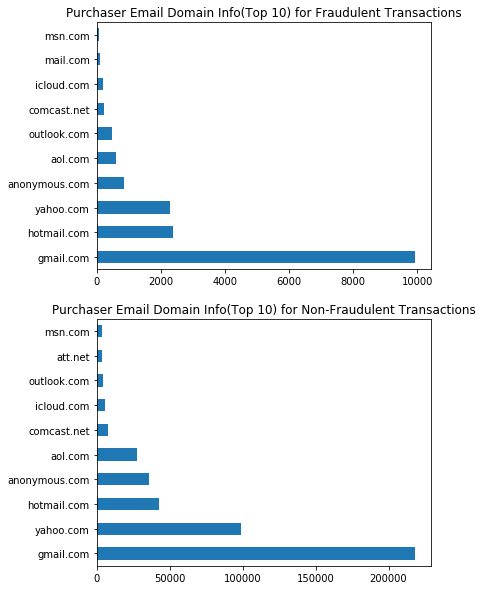

In [192]:
fraud_p_email_info = df_fraud['P_emaildomain'].value_counts()
nfraud_p_email_info = df_nfraud['P_emaildomain'].value_counts()
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
fraud_p_email_info.nlargest(10).plot(kind = 'barh', figsize = (6,10))
plt.title('Purchaser Email Domain Info(Top 10) for Fraudulent Transactions')
plt.subplot(2,1,2)
nfraud_p_email_info.nlargest(10).plot(kind = 'barh', figsize = (6,10))
plt.title('Purchaser Email Domain Info(Top 10) for Non-Fraudulent Transactions')
plt.show()

Based on the bar chart for the top 10 purchaser email domains, it is clear that gmail.com is the most frequently used email domain for both fraudulent and non-fraudulent transactions alike. Again, just like the intuition for the transaction price, one might want to use a common email domain while committing fraud so as not to be flagged on this basis.

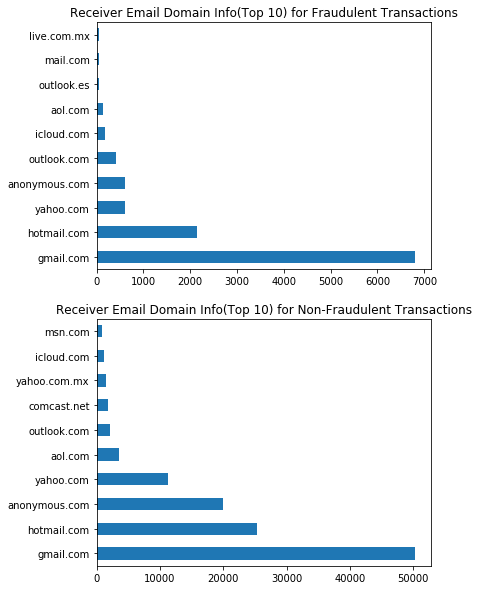

In [62]:
fraud_r_email_info = df_fraud['R_emaildomain'].value_counts()
nfraud_r_email_info = df_nfraud['R_emaildomain'].value_counts()
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
fraud_r_email_info.nlargest(10).plot(kind = 'barh', figsize = (6,10))
plt.title('Receiver Email Domain Info(Top 10) for Fraudulent Transactions')
plt.subplot(2,1,2)
nfraud_r_email_info.nlargest(10).plot(kind = 'barh', figsize = (6,10))
plt.title('Receiver Email Domain Info(Top 10) for Non-Fraudulent Transactions')
plt.show()

The majority of the Receiver Email domain values actually are NaN values in the data. However, of the data that's present, we can once again see that gmail.com is the most popular domain and that the fraudulent and non-fraudulent transactions follow a very similar trend.


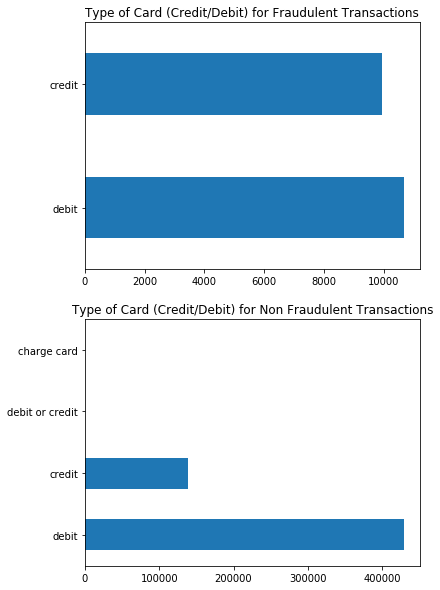

In [209]:
plt.figure(figsize = (6,10))
plt.subplot(2,1,1)
df_fraud['card6'].value_counts().plot(kind = 'barh')
plt.title('Type of Card (Credit/Debit) for Fraudulent Transactions')
plt.subplot(2,1,2)
df_nfraud['card6'].value_counts().plot(kind = 'barh')
plt.title('Type of Card (Credit/Debit) for Non Fraudulent Transactions')
plt.show()

We can see that debit cards are more popular for both fraudulent and non-fraudulent transactions alike based on the above graph. Surprisingly, there seem to be a significantly higher number of debit card transactions for non-fraudulent transactions in comparison with credit card transactions.

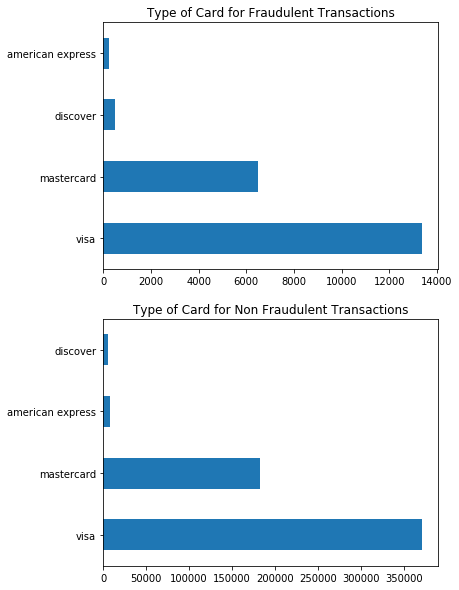

In [204]:
plt.figure(figsize = (6,10))
plt.subplot(2,1,1)
df_fraud['card4'].value_counts().plot(kind = 'barh')
plt.title('Type of Card for Fraudulent Transactions')
plt.subplot(2,1,2)
df_nfraud['card4'].value_counts().plot(kind = 'barh')
plt.title('Type of Card for Non Fraudulent Transactions')
plt.show()

From the above graph, we can see that Visa Cards are the most popular card for both transactions alike. However, something worth noticing from the above graphs is the fact that the ratio between fraudulent to non-fraudulent transactions seems to be high(relatively) in the case of Discover cards.

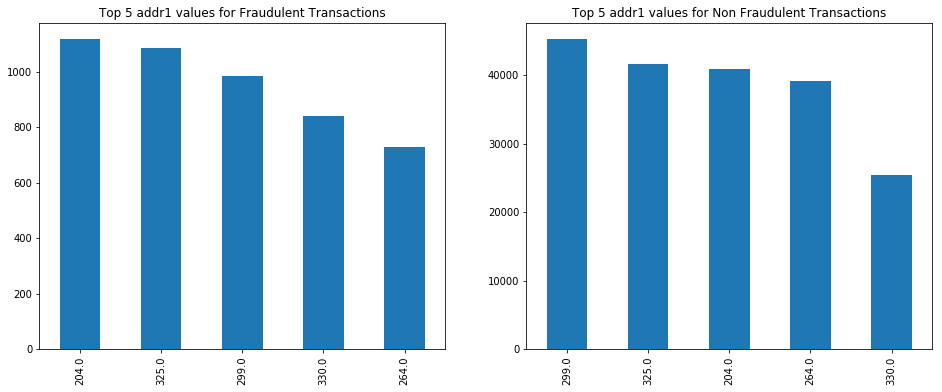

In [213]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
df_fraud['addr1'].value_counts().nlargest(5).plot(kind = 'bar')
plt.title('Top 5 addr1 values for Fraudulent Transactions')
plt.subplot(1,2,2)
df_nfraud['addr1'].value_counts().nlargest(5).plot(kind = 'bar')
plt.title('Top 5 addr1 values for Non Fraudulent Transactions')
plt.show()

From the above graph, we can notice that 204.0 seems to be a very frequent code for fraudulent transactions and it also seems to have a ratio which is relatively high as compared to the other codes.

## Part 2 - Transaction Frequency

In [47]:
df_main['addr2'].value_counts().nlargest(1)

87.0    520481
Name: addr2, dtype: int64

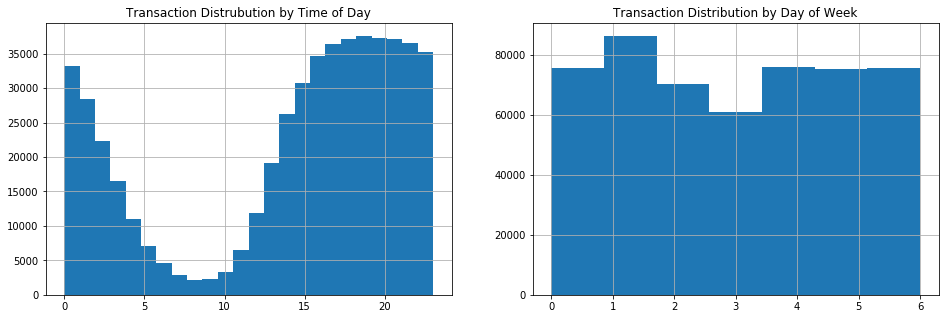

In [161]:
# TODO: code to generate the frequency graph
frequent_country = df_main[df_main['addr2'] == 87.0]
frequent_country = frequent_country.assign(Day_of_Transaction = ((frequent_country['TransactionDT']/ 86400).astype(int))%7 )
frequent_country = frequent_country.assign(Hour_of_Transaction = ((frequent_country['TransactionDT']/ 3600).astype(int))%24)
frequent_country_fraud = frequent_country[frequent_country['isFraud'] == 1]
frequent_country_nfraud = frequent_country[frequent_country['isFraud'] == 0]
df_main = df_main.assign(Day_of_Transaction = ((df_main['TransactionDT']/ 86400).astype(int))%7)
df_main = df_main.assign(Hour_of_Transaction = ((df_main['TransactionDT']/ 3600).astype(int))%24)
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
frequent_country['Hour_of_Transaction'].hist(bins = 24)
plt.title('Transaction Distrubution by Time of Day')
plt.subplot(1,2,2)
frequent_country['Day_of_Transaction'].hist(bins = 7)
plt.title('Transaction Distribution by Day of Week')
plt.show()

1. To clean the data for the future question as well, I noticed that there are 86400 seconds in a day and this is the value that the TransactionDT field starts with and it increases from there. Therefore, to get a day of the week, I divided the whole field by 86,400 and took the remainder when divided by 7. Similarly, for hour in a day, I divided the field by 3600(seconds in an hour) and took %24 of that value to get an hour from 0-23. 

2. From the above distribution of transactions based on hour of day for the most frequent country code(87.0), we can say with a reasonable amount of confidence that the waking hours associated with this countr might be from hour 11-23 and 0-2 on the graph. Therefore, the sleeping hours might likely be from hours 3-10 in the graph. This is inferred by the general assumption that not many transactions will be made during the time when the majority of the population of a country is sleeping.

## Part 3 - Product Code

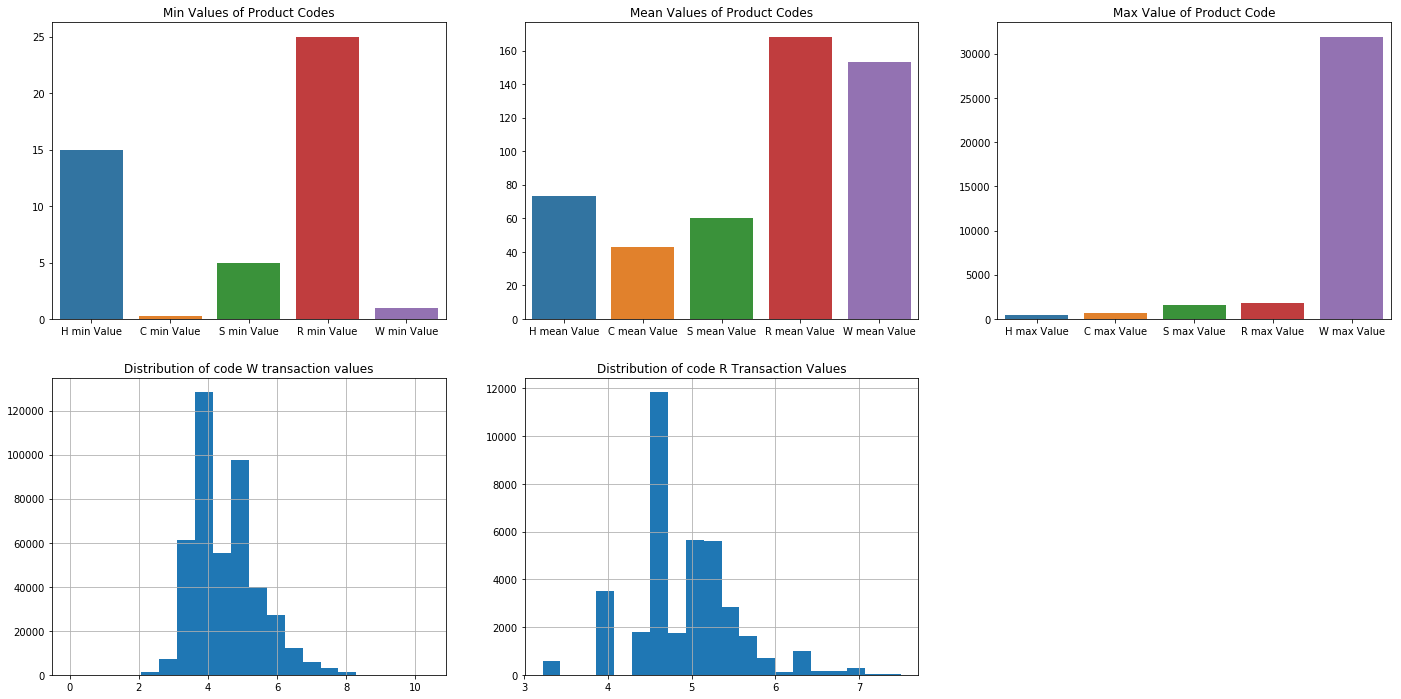

In [45]:
max_labels = []
mean_labels = []
min_labels = []
min_vals = []
max_vals = []
mean_vals = []
for product_code in df_main.ProductCD.unique():
  temp = df_main[df_main['ProductCD'] == product_code]
  min_labels.append(product_code + ' min Value')
  mean_labels.append(product_code + ' mean Value')
  max_labels.append(product_code + ' max Value')
  min_vals.append(temp['TransactionAmt'].min())
  mean_vals.append(temp['TransactionAmt'].mean())
  max_vals.append(temp['TransactionAmt'].max())
plt.figure(figsize = (24,12))
plt.subplot(2,3,1)
plt.title('Min Values of Product Codes')
sns.barplot(min_labels, min_vals)
plt.subplot(2,3,2)
plt.title('Mean Values of Product Codes')
sns.barplot(mean_labels, mean_vals)
plt.subplot(2,3,3)
plt.title('Max Value of Product Code')
sns.barplot(max_labels, max_vals)
plt.subplot(2,3,4)
plt.title('Distribution of code W transaction values')
temp = df_main[df_main['ProductCD'] == 'W']
np.log(temp['TransactionAmt']).hist(bins = 20)
plt.subplot(2,3,5)
plt.title('Distribution of code R Transaction Values')
temp = df_main[df_main['ProductCD'] == 'R']
np.log(temp['TransactionAmt']).hist(bins = 20)
plt.show() 

1. Based on the graph showing the mean transaction value of each product code, we can immediately see that product codes 'W' and 'R' seem to have the highest average value per transaction. However, the max value for 'W' is signifcantly larger than that of 'R'. This outlier in the data might have something to do with the larger mean of the 'W' product code. If we look at the distributions of the product codes 'W' and 'R' we can see that 'R' transaction value seems to be more concentrated in a larger value area. Hence, the most expensive product code might be 'R' followed by 'W'. 

2. Once again, based on the graph of mean transaction value based on product code, we can see that products with code 'C' have the least mean value and a very low minimum and maximum value. Therefore, it can be reasonably concluded that 'C' product code is the one associated with the least expensive products.

## Part 4 - Correlation Coefficient

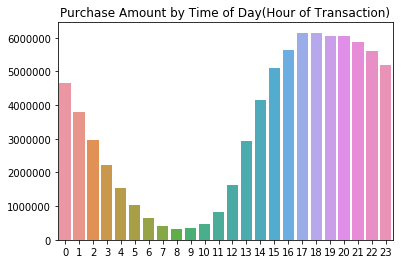

[[1.         0.64211749]
 [0.64211749 1.        ]]


In [67]:
# TODO: code to calculate correlation coefficient
labels = [str(i) for i in range(0,24)]
sum_vals = []
hours = [i for i in range(0,24)]
for i in range(0, 24):
  sum_vals.append(df_main.loc[df_main['Hour_of_Transaction'] == i, 'TransactionAmt'].sum())
sns.barplot(labels, sum_vals, order = labels)
plt.title('Purchase Amount by Time of Day(Hour of Transaction)')
plt.show()
print(np.corrcoef(sum_vals, hours))

1. To plot this graph, I used the hour of day column which was calculated earlier in question 2. I plotted the distribution of the sum of transaction values made based on the hour of the day. As expected, we can see that the sum of transaction values is folowing a very similar trend with that of the amount of transactions based on the hour of day, seen in question 2. As expected, the hours which we inferred to be the sleeping hours(3-11) show the least sums in transaction values from the graph.

2. The correlation coefficient for these two fields is 0.642. This seems intuitively right based on our inferences drawn. It is expected for these two columns to be highly correlated.

## Part 5 - Interesting Plot

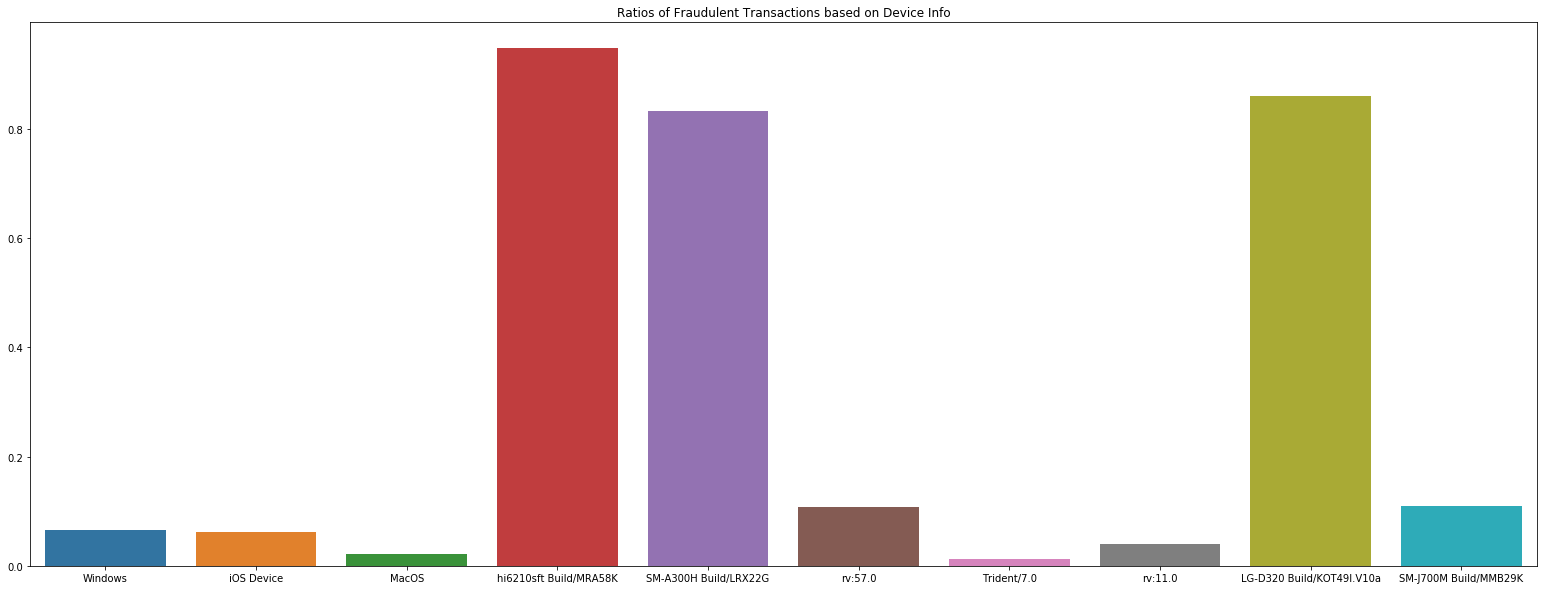

In [106]:
# TODO: code to generate the plot here.
ratios = []
fraud_counts = fraud_device_info.nlargest(10).tolist()
fraud_device_ratio_labels = fraud_device_info.nlargest(10).index.tolist()
for device,fraud_count in zip(fraud_device_info.nlargest(10).index.tolist(), fraud_counts):
  denominator = df_main[df_main['DeviceInfo'] == device].DeviceInfo.count()
  ratios.append(fraud_count/denominator)
plt.figure(figsize = (27,10))
plt.title('Ratios of Fraudulent Transactions based on Device Info')
sns.barplot(fraud_device_ratio_labels, ratios)
plt.show()


I wanted to see which devices in specific were more likely to be associated with fraudulent transactions as compared to other ones. Therefore, I decided to plot a bar plot showing the ratios of fraudulent transactions for the top 10 devices for fraudulent transactions from question 1. From this graph we can see that the 'hi6210sft Build/MRA58K', 'SM-A300H Build/LRX22G', and the 'LG-D320 Build/KOT49l.V10a' models have the highest ratios of fraudulent transactions associated with them. However, this could also be due to the lack of data for non-fraudulent transactions associated with these specific devices. Nevertheless, I thin that it is interesting to see a ratio of greater thant 80% for these devices.

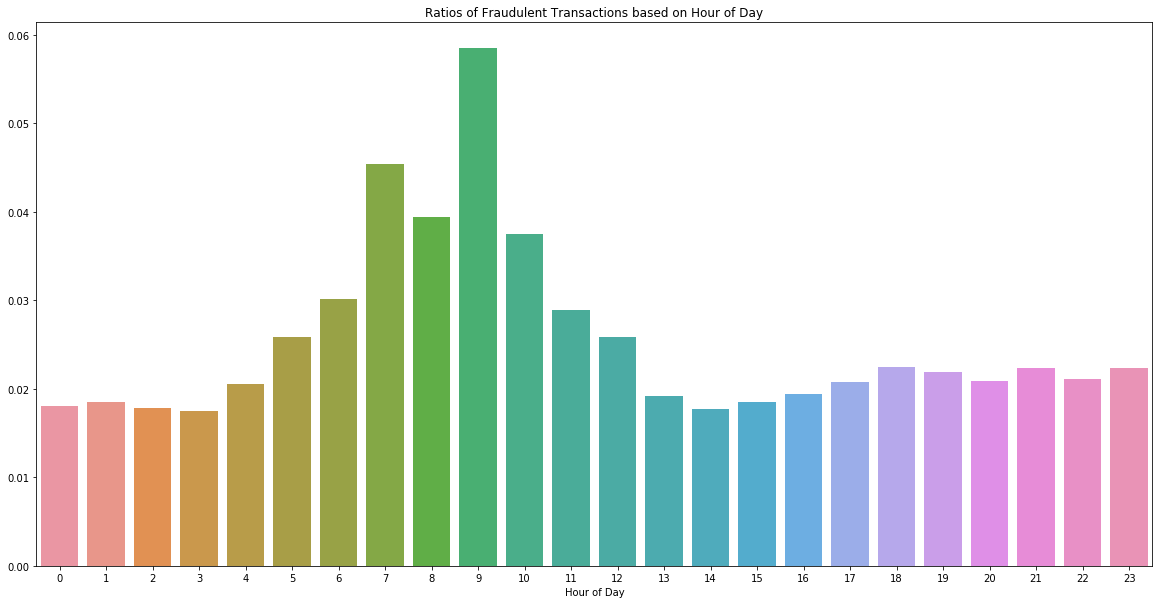

In [182]:
t_ratios = []
hours = [i for i in range(0,24)]
hour_ratios = []
for hour in hours:
  num = frequent_country_fraud[frequent_country_fraud['Hour_of_Transaction'] == hour].Hour_of_Transaction.count()
  den = df_main[df_main['Hour_of_Transaction'] == hour].Hour_of_Transaction.count()
  hour_ratios.append(num/den)
plt.figure(figsize = (20,10))
plt.title('Ratios of Fraudulent Transactions based on Hour of Day')
sns.barplot(hours, hour_ratios)
plt.xlabel('Hour of Day')
plt.show()


I decided to see the ratio of fraudulent transactions based on the hour of day. From this distribution, we can clearly see that the ratio of fraudulent transaction is siginificantly higher during the sleeping hours for a specific country(in this case, 87.0 country code was used). This might be because of the fact that the frauds are being committed internationally, or due to other reasons. Nevertheless, I found it very interesting to see that the ratio of the fraudulent transactions are the highest when there are very few transactions being made at all in a specific country.

## Part 6 - Prediction Model

In [0]:
Y = df_main.pop('isFraud')
date_time = df_main.pop('TransactionDT')

In [163]:
# TODO: code for your final model

#fill in missing values
X = df_main
X['addr1'].fillna(-999 , inplace = True)
X['addr2'].fillna(-999, inplace = True)
X['dist1'].fillna(-999 , inplace = True)
X['dist2'].fillna(-999 , inplace = True)
X.fillna('Not Specified', inplace = True)

#Normalization
X['addr1'] = (X['addr1'] - X['addr1'].mean()) / X['addr1'].std()
X['addr2'] = (X['addr2'] - X['addr2'].mean()) / X['addr2'].std()
X['dist1'] = (X['dist1'] - X['dist1'].mean()) / X['dist1'].std()
X['dist2'] = (X['dist2'] - X['dist2'].mean()) / X['dist2'].std()
X['TransactionAmt'] = (X['TransactionAmt'] - X['TransactionAmt'].mean()) / X['TransactionAmt'].std()

#Label Encoding
le = preprocessing.LabelEncoder()
X['DeviceType'] = le.fit_transform(X['DeviceType'])
X['DeviceType'] = X['DeviceType'].astype('category')
X['DeviceInfo'] = le.fit_transform(X['DeviceInfo'])
X['DeviceInfo'] = X['DeviceInfo'].astype('category')
X['card4'] = le.fit_transform(X['card4'])
X['card4'] = X['card4'].astype('category')
X['card6'] = le.fit_transform(X['card6'])
X['card6'] = X['card6'].astype('category')
X['P_emaildomain'] = le.fit_transform(X['P_emaildomain'])
X['P_emaildomain'] = X['P_emaildomain'].astype('category')
X['R_emaildomain'] = le.fit_transform(X['R_emaildomain'])
X['R_emaildomain'] = X['R_emaildomain'].astype('category')
X['ProductCD'] = le.fit_transform(X['ProductCD'])
X['ProductCD'] = X['ProductCD'].astype('category')



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
clf = LogisticRegression(solver='sag')
clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
preds = clf.predict(X_test)
print(preds)
print("Predicting probability of Fraud using a Logistic Regression classifier:")
print("\nThe classifier's accuracy is %s percent\n" % round(100*accuracy_score(y_test, preds), 2))

[0 0 0 ... 0 0 0]
Predicting probability of Fraud using a Logistic Regression classifier:

The classifier's accuracy is 96.44 percent



In [0]:
z1 = pd.read_csv('test_transaction.csv')
z2 = pd.read_csv('test_identity.csv')

t3 = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 
     'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2', 'dist1' , 'dist2']
z1 = z1[t3]
z2 = z2[t2]
z_main = pd.merge(z1,z2, on = "TransactionID", how = "outer")

#Fill missing vals
z_main['addr1'].fillna(-999 , inplace = True)
z_main['addr2'].fillna(-999 , inplace = True)
z_main['dist1'].fillna(-999 , inplace = True)
z_main['dist2'].fillna(-999 , inplace = True)
z_main.fillna('Not Specified', inplace = True)

#new features
z_main = z_main.assign(Day_of_Transaction = ((z_main['TransactionDT']/ 86400).astype(int))%7)
z_main = z_main.assign(Hour_of_Transaction = ((z_main['TransactionDT']/ 3600).astype(int))%24)
z_transactiondt = z_main.pop('TransactionDT')

#Feature Normalization
z_main['addr1'] = (z_main['addr1'] - z_main['addr1'].mean()) / z_main['addr1'].std()
z_main['addr2'] = (z_main['addr2'] - z_main['addr2'].mean()) / z_main['addr2'].std()
z_main['dist1'] = (z_main['dist1'] - z_main['dist1'].mean()) / z_main['dist1'].std()
z_main['dist2'] = (z_main['dist2'] - z_main['dist2'].mean()) / z_main['dist2'].std()
z_main['TransactionAmt'] = (z_main['TransactionAmt'] - z_main['TransactionAmt'].mean()) / z_main['TransactionAmt'].std()

#Label Encoding
z_main['DeviceType'] = le.fit_transform(z_main['DeviceType'])
z_main['DeviceType'] = z_main['DeviceType'].astype('category')
z_main['DeviceInfo'] = le.fit_transform(z_main['DeviceInfo'])
z_main['DeviceInfo'] = z_main['DeviceInfo'].astype('category')
z_main['card4'] = le.fit_transform(z_main['card4'])
z_main['card4'] = z_main['card4'].astype('category')
z_main['card6'] = le.fit_transform(z_main['card6'])
z_main['card6'] = z_main['card6'].astype('category')
z_main['P_emaildomain'] = le.fit_transform(z_main['P_emaildomain'])
z_main['P_emaildomain'] = z_main['P_emaildomain'].astype('category')
z_main['R_emaildomain'] = le.fit_transform(z_main['R_emaildomain'])
z_main['R_emaildomain'] = z_main['R_emaildomain'].astype('category')
z_main['ProductCD'] = le.fit_transform(z_main['ProductCD'])
z_main['ProductCD'] = z_main['ProductCD'].astype('category')

In [0]:
final = z_main[['TransactionID']].copy()
#predictions = clf.predict(z_main)
predictions = clf.predict_proba(z_main)[:,1]
final = final.assign(isFraud = predictions)
final.head(5)
final.to_csv('final.csv')

1. To create my model, I experimented with various techniques. Firstly, I decided to treat all of the missing values. For the numerical columns such as dist1, addr1, etc, I decided to replace all of the missing values with a highly arbitrary random number (-999). For textual columns which were categorical, I decided to replace the missing values with 'Not Specified'. In addition, I decided to normalize my numerical features by using the mean normalization technique. In addition to this, I used label encoding to encode all of my categorical features. I decided to train my model with only the features mentioned in this homework and I did not add additional columns. I trained my model using logistic regression and random forrest algorithms. With the Logistic regression, I realized that my model did best with the stochaistic gradient descent solver. I did notice that my model did worse when I was normalizing my feature vectors, and I was not able to find out why this was the case. 

2. My model turned out with an accuracy of 96.5% but I know that this was the case due to the presence of an imbalanced dataset with the 'isFraud' variable.

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/saketh03

Highest Rank: 5725

Score: 0.5238

Number of entries: 7

INCLUDE IMAGE OF YOUR KAGGLE RANKING:![alt text](https://drive.google.com/uc?id=1wKy9BvBkmR9p92swSIetfTOK-mhazsbA)